<a href="https://colab.research.google.com/github/sethtroisi/OEIS/blob/master/A037274/HomePrimeStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Download home_primes datafile
!curl https://raw.githubusercontent.com/sethtroisi/OEIS/master/A037274/home_primes.txt > home_primes.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3964k  100 3964k    0     0  11.2M      0 --:--:-- --:--:-- --:--:-- 11.2M


In [2]:
all_steps = {}
home_primes = {} # Unused
with open("home_primes.txt") as f:
  # each line is "<base> <start> <step> <status>: <factor> <factor> ..."
  for line in f.readlines():
    pre, post = line.strip().split(":")
    *pre, status = pre.split()
    base, start, step, = map(int, pre)
    assert base == 10
    
    factors = list(map(int, post.split()))
    assert status in ("FF", "P", "CF"), line
    all_steps[(start, step, status)] = factors
    if status in ("P", "CF"):
      home_primes[(start, step, status)] = factors
      
print (len(home_primes), len(set(start for start,_,_ in home_primes)))
print (len(all_steps), "steps")

4999 4999
62458 steps


In [0]:
#@title Define Panda's dataframe

import math
import pandas as pd
from operator import itemgetter

starts, steps, status = list(zip(*sorted(all_steps)))
finished = [s == "P" for s in status]

number_bits = []
number_digits = []
for (start,_,_), factors in sorted(all_steps.items()):
  number_bits.append(int(math.ceil(sum(math.log2(f) for f in factors))))
  number_digits.append(int(sum(math.ceil(math.log10(f)) for f in factors)))

data = {
    "start": starts,
    "steps": steps,
    "status": status,
    "finished": finished,
    "number_bits": number_bits,
    "number_digits": number_digits
}

all_steps_df = pd.DataFrame(data)
df = all_steps_df.copy(True)
df = df[df.status.isin(("P", "CF"))]

del starts, steps, status, finished, number_bits, number_digits

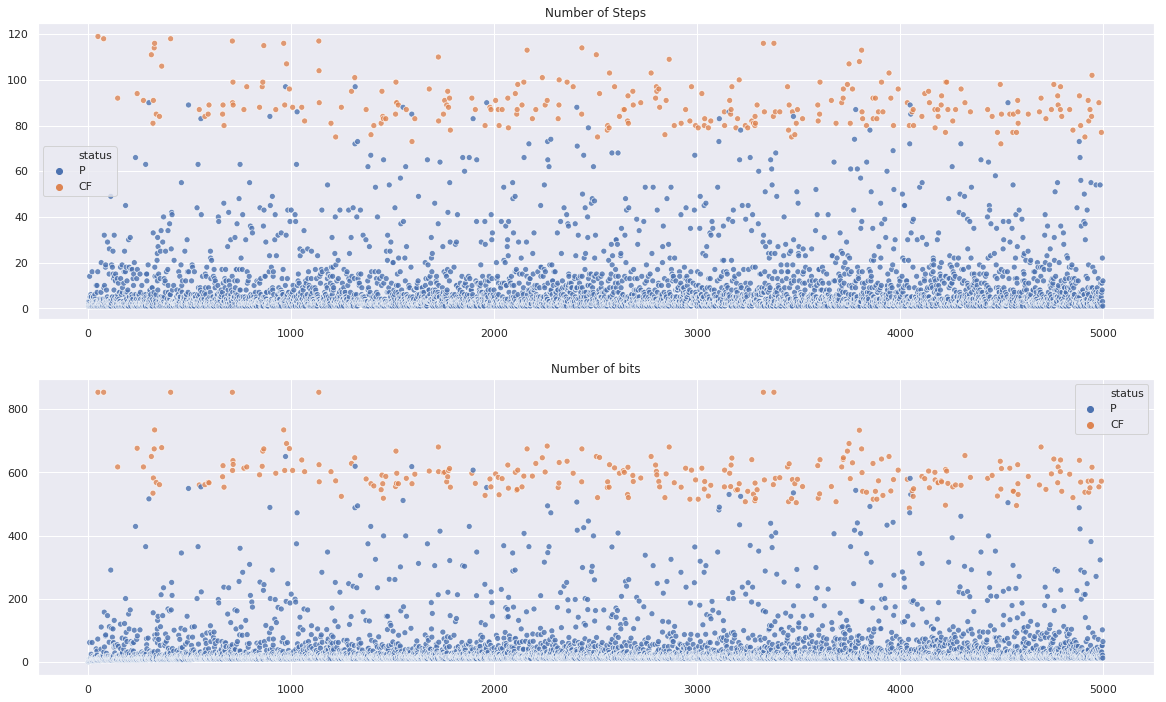

In [4]:
#@title Number of Steps/bits
from matplotlib import pyplot as plt
plt.figure(figsize=(20,12))

import seaborn as sns
sns.set()

plt.subplot(2, 1, 1)
ax = sns.scatterplot(x="start", y="steps", hue="status", data=df, alpha=0.8)
ax.set_title('Number of Steps')
ax.set_ylabel(''); ax.set_xlabel('')

plt.subplot(2, 1, 2)
ax = sns.scatterplot(x="start", y="number_bits", hue="status", data=df, alpha=0.8)
ax.set_title('Number of bits')
ax.set_ylabel(''); ax.set_xlabel('')

pass

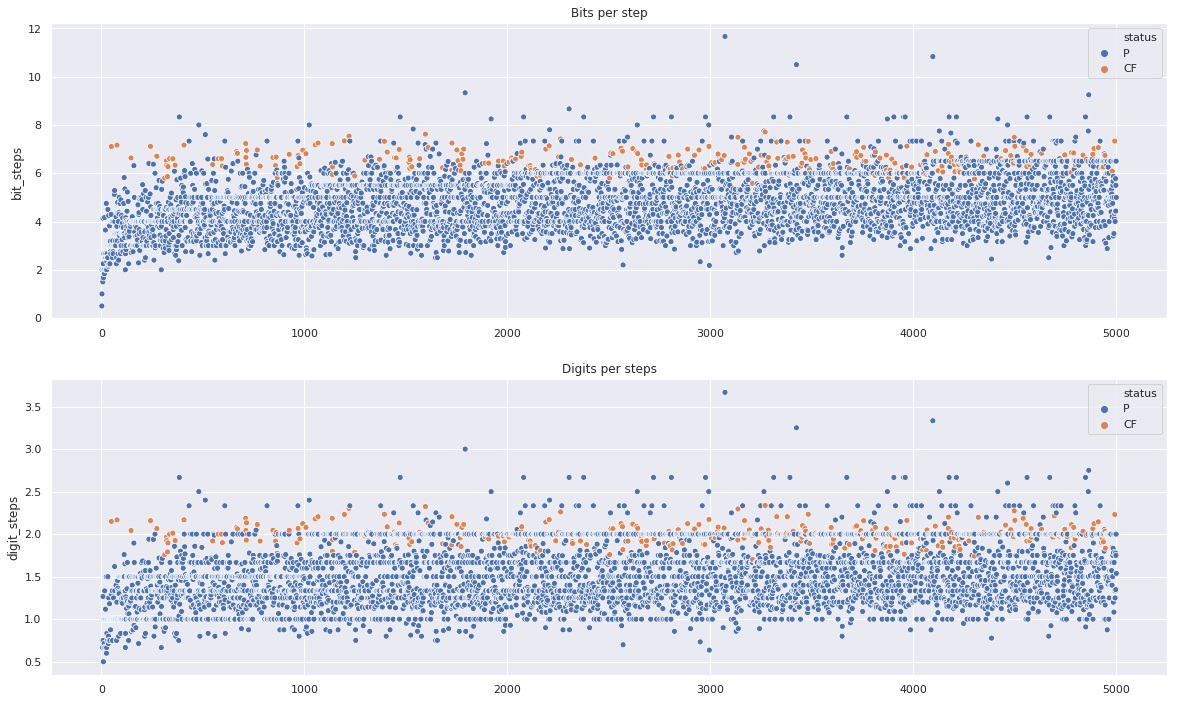

In [5]:
#@title Digits/Bits per step
plt.figure(figsize=(20,12))

df['bit_steps'] = df.number_bits / (df.steps + 1)
df['digit_steps'] = df.number_digits / (df.steps + 1)

plt.subplot(2, 1, 1)
ax = sns.scatterplot(x="start", y="bit_steps", hue="status", data=df)
ax.set_title('Bits per step')
ax.set_xlabel('')

plt.subplot(2, 1, 2)
ax = sns.scatterplot(x="start", y="digit_steps", hue="status", data=df)
ax.set_title('Digits per steps')
ax.set_xlabel('')


pass

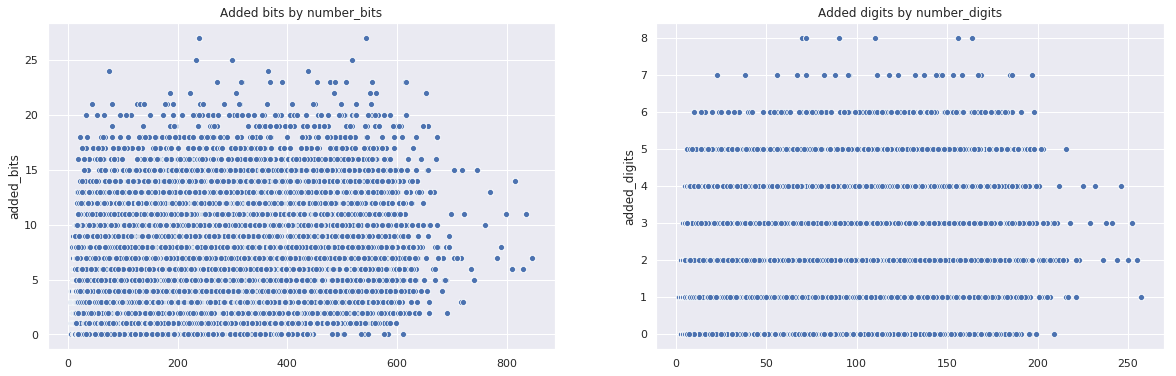

In [12]:
#@title Added Digits/Bits by current Digits/Bits

added_bits = []
added_digits = []

#filtered
f = all_steps_df.copy(True)

f['step_delta'] = ((f['steps'] > 1) & (f['finished'] == False) & (f['status'] != 'CF')) * \
                   (f['steps'].shift(-1) - f['steps'])
f['added_bits']   = f['step_delta'] * (f['number_bits'].shift(-1) - f['number_bits'])
f['added_digits'] = f['step_delta'] * (f['number_digits'].shift(-1) - f['number_digits'])

#print (f[['start', 'steps', 'finished', 'step_delta', 'added_bits', 'added_digits']])

plt.figure(figsize=(20, 6))

filtered = f[f.step_delta > 0]

plt.subplot(1, 2, 1)
ax = sns.scatterplot(x="number_bits", y="added_bits", data=filtered)
ax.set_title('Added bits by number_bits')
ax.set_xlabel('')

plt.subplot(1, 2, 2)
ax = sns.scatterplot(x="number_digits", y="added_digits", data=filtered)
ax.set_title('Added digits by number_digits')
ax.set_xlabel('')

pass